### Understanding the data

According to the description of this dataset, all features went through a PCA transformation so we don't know what exactly these columns represent. We assume the columns are already scaled (a necessary step for PCA transformation). 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA, TruncatedSVD


In [5]:
df = pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Examine the distribution of Fraud vs Non-fraud transaction

In [15]:
df_count = df.groupby("Class").count()
df_count.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


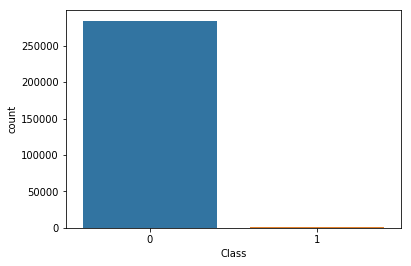

In [14]:
ax = sns.countplot(x="Class", data=df)

#### Distribution of Transaction Amount

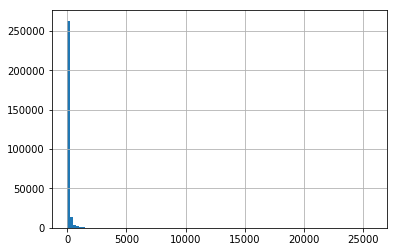

In [20]:
df["Amount"].hist(bins=100)

#### Distribution of Transaction Time

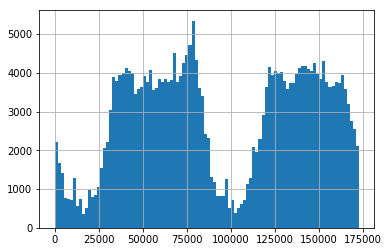

In [21]:
df["Time"].hist(bins=100)

### Preprocessing

#### Generating training and testing datasets

In [27]:
X = df.drop("Class",axis=1)


In [29]:
y = df["Class"]

In [25]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

### Resampling

In [119]:
# A function that uses PCA transformation to turn features to 2D and plot the features
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [120]:
y_train.value_counts()

0    199030
1       334
Name: Class, dtype: int64

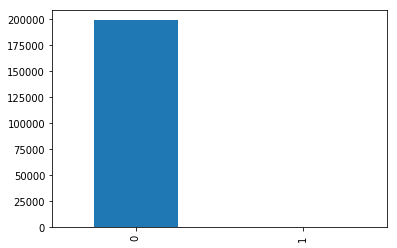

In [121]:
y_train.value_counts().plot(kind="bar")

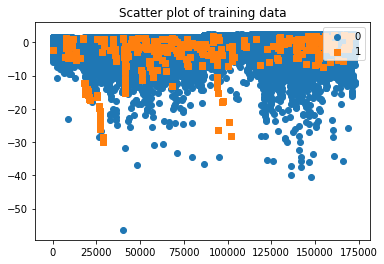

In [122]:
plot_2d_space(X_train.values, y_train.values, 'Scatter plot of training data')



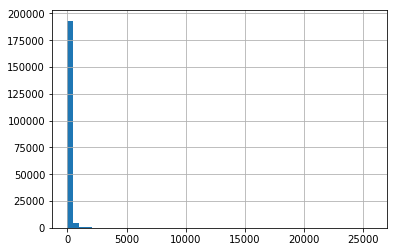

In [123]:
### Distribution of Amount before transformation
X_train["Amount"].hist(bins=50)

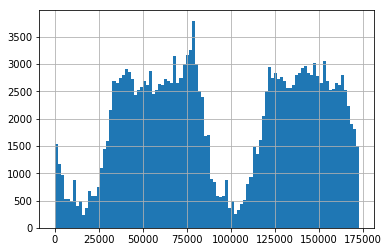

In [124]:
### Distribution of Time before transformation
X_train["Time"].hist(bins=100)

In [125]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X_train, y_train)

# X_smt, y_smt are np arrays

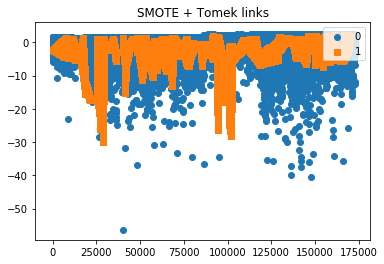

In [51]:
plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')


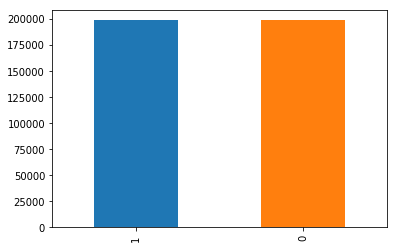

In [64]:
pd.Series(y_smt).value_counts().plot(kind="bar")

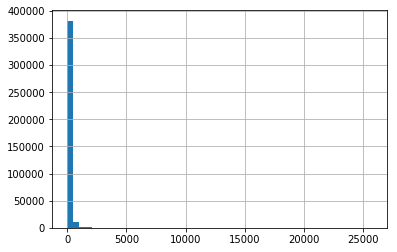

In [87]:
### Distribution of Amount after transformation
X_smt[:,29]  # Amount is the 30th feature in X_train
pd.Series(X_smt[:,29]).hist(bins=50)

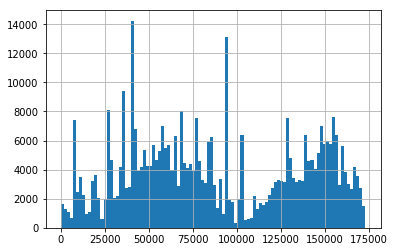

In [90]:
### Distribution of Time after transformation
X_smt[:,0]  # Time is the 1st feature in X_train
pd.Series(X_smt[:,0]).hist(bins=100)

#### Observations:
- The distribution of time after resampling follows a similar shape as the original table, but overall the distribution of Time has more prominent peaks (around 40000, 90000), suggesting that data is more densely distributed

In [93]:
df.columns[0:29]

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [131]:
X_smt.shape

(396648, 30)

In [113]:
resample_X = pd.DataFrame(X_smt, columns=df.columns[0:30])

In [117]:
resample_y = pd.DataFrame(y_smt, columns=["Class"])
resample_y

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [136]:
resample_df = np.append(resample_X, resample_y, 1)

In [137]:
resample_df = pd.DataFrame(resample_df, columns=df.columns)

In [139]:
resample_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,158453.0,2.094561,-0.827280,-1.493206,-0.513444,-0.428918,-0.794959,-0.281462,-0.288319,-0.539413,...,-0.120575,0.051099,0.103849,0.684904,-0.071362,0.761780,-0.080165,-0.049095,65.14,0.0
1,163503.0,1.971197,-0.326286,-1.303626,0.363868,0.099659,-0.301053,-0.024899,-0.091013,0.527642,...,0.191623,0.746659,0.005074,0.860414,0.185236,0.666558,-0.080570,-0.069806,29.61,0.0
2,143201.0,2.031495,-0.269744,-0.536151,0.298784,-0.340236,-0.348439,-0.426236,-0.078201,1.243864,...,-0.218718,-0.446918,0.280030,-0.684374,-0.318016,-0.583326,0.037731,-0.036324,7.99,0.0
3,81865.0,-2.624081,2.153765,0.752903,0.234243,-1.195105,1.798252,-3.797852,-6.979159,-0.908887,...,-3.528764,2.117063,0.327859,0.248706,-0.463584,0.404743,0.207824,0.184777,29.99,0.0
4,80145.0,-0.857634,1.107747,1.063217,1.243953,-0.142669,0.322056,0.146324,0.715638,-0.631533,...,0.066211,0.313025,-0.065624,0.022921,-0.111658,-0.237568,0.292232,0.120861,26.45,0.0


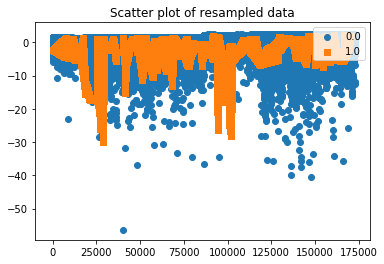

In [147]:
plot_2d_space(resample_df.drop("Class",axis=1).values, resample_df["Class"].values, 'Scatter plot of resampled data')

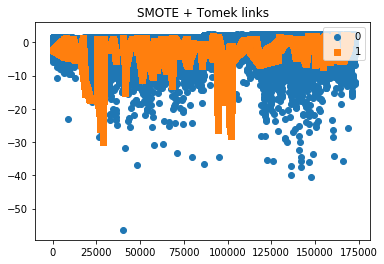

In [148]:
plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

We compare the scatterplots of the new dataframe with the resampled X and y arrays to make sure features of the new dataset correctly match the labels

In [151]:
resample_df.to_csv("data/resample_df.csv")